# Explore here

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import math
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from pickle import dump
import utils as eda
from sklearn.neighbors import KNeighborsClassifier








In [22]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv"

df = pd.read_csv(url , sep= ";")
df
target = 'label'

In [23]:
eda.analisis(df)

Variables numéricas: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Variables no numéricas: []

Shape del dataset: (1599, 12)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   f

In [24]:
# Eliminar duplicados
total_data = df.drop_duplicates()
print(df.columns.tolist()[:20])
print(df.shape)
print(df.head(2))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
(1599, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5  


In [ ]:

total_data['label'] = (total_data['quality'] >= 6).astype(int)

# X, y
X = total_data.drop(columns=['quality', 'label'])
y = total_data['label']

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN con k fijo (ajusta k si quieres)
k = 15
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Evaluación
y_pred = knn.predict(X_test_scaled)
print("accuracy:", accuracy_score(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("\nclassification_report:\n", classification_report(y_test, y_pred, target_names=["not_good", "good"]))

accuracy: 0.7463235294117647
confusion_matrix:
 [[ 91  37]
 [ 32 112]]

classification_report:
               precision    recall  f1-score   support

    not_good       0.74      0.71      0.73       128
        good       0.75      0.78      0.76       144

    accuracy                           0.75       272
   macro avg       0.75      0.74      0.74       272
weighted avg       0.75      0.75      0.75       272



k	Train Acc	Test Acc
------------------------------
1	1.0000		0.6691
2	0.8418		0.6213
3	0.8445		0.6544
4	0.8059		0.6544
5	0.8059		0.6875
6	0.7948		0.6912
7	0.7948		0.7096
8	0.7783		0.7169
9	0.7866		0.6985
10	0.7746		0.7059
11	0.7783		0.7132
12	0.7700		0.7206
13	0.7728		0.7279
14	0.7654		0.7243
15	0.7682		0.7463
16	0.7682		0.7316
17	0.7728		0.7316
18	0.7645		0.7243
19	0.7672		0.7390
20	0.7636		0.7353

Mejor k: 15 | Mejor accuracy en test: 0.7463

Métricas con el mejor k:
accuracy: 0.7463235294117647
confusion_matrix:
 [[ 91  37]
 [ 32 112]]

classification_report:
               precision    recall  f1-score   support

    not_good       0.74      0.71      0.73       128
        good       0.75      0.78      0.76       144

    accuracy                           0.75       272
   macro avg       0.75      0.74      0.74       272
weighted avg       0.75      0.75      0.75       272



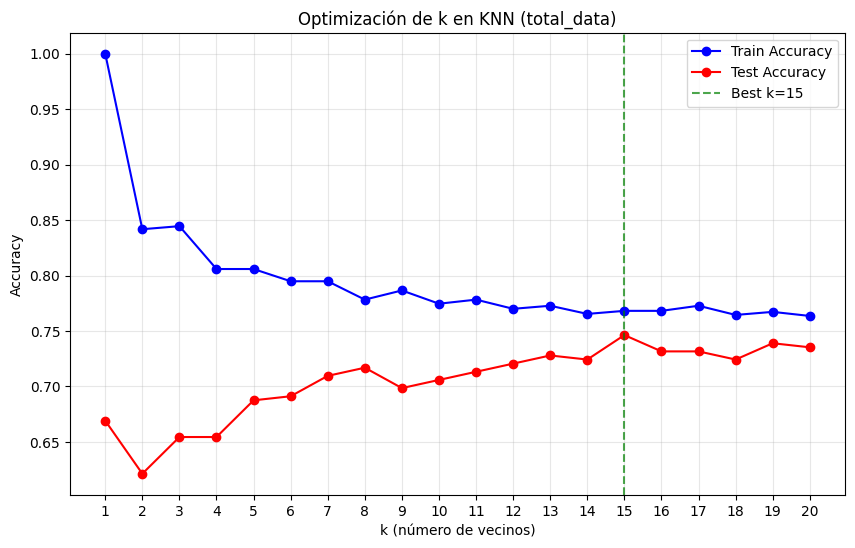

In [ ]:
# Bucle de optimización de k
k_values = range(1, 20 + 1)
train_accuracies, test_accuracies = [], []

print("k\tTrain Acc\tTest Acc")
print("-" * 30)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    print(f"{k}\t{train_acc:.4f}\t\t{test_acc:.4f}")

# Mejor k
best_k = k_values[np.argmax(test_accuracies)]
print(f"\nMejor k: {best_k} | Mejor accuracy en test: {max(test_accuracies):.4f}")

# Entrenar y evaluar con mejor k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred = best_knn.predict(X_test_scaled)

print("\nMétricas con el mejor k:")
print("accuracy:", accuracy_score(y_test, y_pred))
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))
print("\nclassification_report:\n", classification_report(y_test, y_pred, target_names=["not_good", "good"]))


plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, 'o-', label='Train Accuracy', color='blue')
plt.plot(k_values, test_accuracies, 'o-', label='Test Accuracy', color='red')
plt.axvline(x=best_k, color='green', linestyle='--', alpha=0.7, label=f'Best k={best_k}')
plt.xlabel('k (número de vecinos)')
plt.ylabel('Accuracy')
plt.title('Optimización de k en KNN (total_data)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.show()